<a href="https://colab.research.google.com/github/RuvindiDilsara/ML_Feature_Engineering/blob/main/Label_2_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/Feature_Engineering"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


**Scale** the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  tr_df = train[train['label_2'].notna()] if target_label == 'label_2' else train
  vl_df = valid[valid['label_2'].notna()] if target_label == 'label_2' else valid
  # test_df = test[test['label_2'].notna()] if target_label == 'label_2' else test
  test_df = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = tr_df[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = vl_df[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_df[target_label]

In [9]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Create a KNN regressor with a specified number of neighbors
regressor = KNeighborsRegressor(n_neighbors=2)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train[L2], y_train[L2])

KNeighborsRegressor(n_neighbors=2)

In [10]:
from sklearn import metrics
# Make predictions
y_pred = regressor.predict(x_valid[L2])
y_pred_test = regressor.predict(x_test[L2])

# Evaluate the KNN Regressor's performance
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred))

Mean Absolute Error: 0.07336956521739131
Mean Squared Error: 0.5998641304347826
R-squared: 0.9858633010130103


## SelectKBest with PCA

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Step 1: Feature selection with SelectKBest
new_selector = SelectKBest(f_classif, k=100)
x_train_new = new_selector.fit_transform(x_train[L2], y_train[L2])
x_valid_new = new_selector.transform(x_valid[L2])
x_test_new = new_selector.transform(x_test[L2])

# Step 2: Apply PCA to the selected features
pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_new)
x_valid_pca = pca.transform(x_valid_new)
x_test_pca = pca.transform(x_test_new)
print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28040, 48)


In [12]:
# Create a KNN regressor with a specified number of neighbors (e.g., n_neighbors=5)
regressor = KNeighborsRegressor(n_neighbors=2)

# Fit the KNN regressor to the PCA-transformed features
regressor.fit(x_train_pca, y_train[L2])

KNeighborsRegressor(n_neighbors=2)

In [13]:
# Make predictions on the validation set
y_pred_sb_pca = regressor.predict(x_valid_pca)
y_pred_sb_pca_test = regressor.predict(x_test_pca)

# Evaluate the KNN Regressor's performance
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid[L2], y_pred_sb_pca))
print("Mean Squared Error:", metrics.mean_squared_error(y_valid[L2], y_pred_sb_pca))
print("R-squared:", metrics.r2_score(y_valid[L2], y_pred_sb_pca))

Mean Absolute Error: 0.1800271739130435
Mean Squared Error: 1.5010190217391304
R-squared: 0.964626232829271


In [14]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test,
    'Predicted labels after feature engineering': y_pred_sb_pca_test,
    'No of new features': x_test_pca.shape[1]
})


for i in range(256):
  if i < x_test_pca.shape[1]:
    output_df[f'new_feature_{i+1}'] = x_test_pca[:, i]
  else:
    output_df[f'new_feature_{i+1}'] = None

<ipython-input-14-88de8513e644>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-14-88de8513e644>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-14-88de8513e644>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [15]:
output_df.shape
output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,26.0,26.0,48,-2.778139,-0.063889,-0.146757,1.648620,2.069153,-5.784919,3.235488,...,None,None,None,None,None,None,None,None,None,None
1,31.0,28.0,48,-7.053892,-4.262354,-1.891888,2.033001,-0.133050,-4.417544,2.141941,...,None,None,None,None,None,None,None,None,None,None
2,26.5,28.0,48,-3.819677,-2.629943,-0.577602,1.627091,-1.221895,-2.821495,3.168477,...,None,None,None,None,None,None,None,None,None,None
3,27.0,27.0,48,-4.684850,-1.790537,0.124819,-0.249532,0.863020,-0.499093,1.949554,...,None,None,None,None,None,None,None,None,None,None
4,31.0,25.0,48,-3.267910,1.116452,-1.955141,0.770765,-1.544124,-2.923509,3.285983,...,None,None,None,None,None,None,None,None,None,None


In [16]:

# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190140L_label_2.csv", index=False)

# Co-relation matrix

In [17]:
x_train_pca_df = pd.DataFrame(x_train_pca)
corr_matrix = x_train_pca_df.corr()
corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000e+00,1.299984e-17,-1.299046e-16,4.368214e-16,9.921922e-16,-2.976879e-16,1.431351e-16,2.016868e-16,-7.288914e-16,-1.724986e-16,...,8.777339e-17,4.908077e-18,-7.989607e-17,-9.936739e-17,5.332193e-18,-3.628701e-17,2.514257e-16,2.055220e-16,8.640662e-17,-1.081248e-16
1,1.299984e-17,1.000000e+00,1.238396e-16,-1.988311e-17,-6.996343e-17,-2.713444e-16,5.169224e-17,1.338512e-16,1.780698e-17,-9.505197e-17,...,7.026659e-17,-2.769635e-17,-1.480997e-16,1.006423e-16,-2.529763e-17,-2.709200e-16,-1.633573e-17,9.932037e-17,-1.327420e-16,4.165676e-17
2,-1.299046e-16,1.238396e-16,1.000000e+00,-7.900057e-16,-3.604876e-18,-2.679274e-16,-5.342533e-16,4.584472e-16,1.665844e-16,-1.831506e-16,...,-2.285328e-16,3.650575e-17,3.334328e-16,2.762433e-16,6.385946e-19,-1.033136e-16,2.045902e-18,-3.331732e-16,1.108847e-16,1.461676e-16
3,4.368214e-16,-1.988311e-17,-7.900057e-16,1.000000e+00,5.703149e-16,-1.073155e-16,-4.873518e-16,-1.675374e-16,-7.526360e-17,-1.399644e-16,...,1.234750e-16,-6.016148e-17,2.021960e-17,-2.576688e-16,-1.941607e-16,4.855530e-17,3.600587e-17,-1.282754e-16,-2.690602e-17,5.717752e-18
4,9.921922e-16,-6.996343e-17,-3.604876e-18,5.703149e-16,1.000000e+00,4.942732e-16,3.352727e-16,-1.100252e-16,2.914180e-17,1.388478e-16,...,6.239939e-17,-1.390453e-16,-1.195329e-16,-1.978099e-16,8.525086e-17,-1.342444e-16,2.347098e-17,3.296941e-16,6.485815e-17,1.357444e-16


<Axes: >

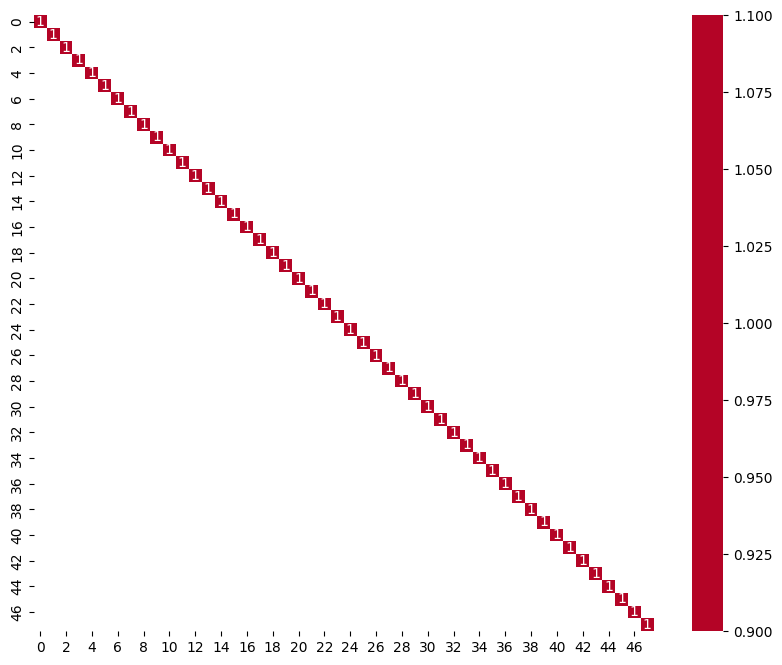

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)